In [1]:
import Merge_Cartesian 

from decimal import *
import math
import copy
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter

In [2]:
plt.rcParams['animation.ffmpeg_path'] = 'C:\\Users\\Jonathan\\Documents\\Academic\\Masters\\Simulator\\Git\\Main_Algorithm\\ffmpeg\\bin\\ffmpeg.exe'

import ipywidgets as widgets
from IPython.display import display
%matplotlib widget

# Get Raw Wavefront Arrays

In [3]:
(data_input,
data_output
) = Merge_Cartesian.Process_Wavefronts(L_impedance = '10',C_impedance = '1')


Information about this network : 


- The Inductor -
Inductor Inductance Per Length :        5.0
Inductor Capacitance Per Length :       0.05
Inductor Length :                       1
Inductor Total Inductance :             5.0
Inductor Total Capacitance :            0.05
Inductor Velocity :                     2
Inductor One Way Time Delay :           0.5
Inductor Impedance :                    10

- The Capacitor -
Capacitor Inductance Per Length :       0.5
Capacitor Capacitance Per Length :      0.5
Capacitor Length :                      1
Capacitor Total Inductance :            0.5
Capacitor Total Capacitance :           0.5
Capacitor Velocity :                    2
Capacitor One Way Time Delay :          0.5
Capacitor Impedance :                   1

- The Time -
Number Periods :                        1
Simulation Stop Time :                  9.934588265796755071824115568
Number of Wavefronts :                  264
Number of Layers :                      11
Inductor Return Tim

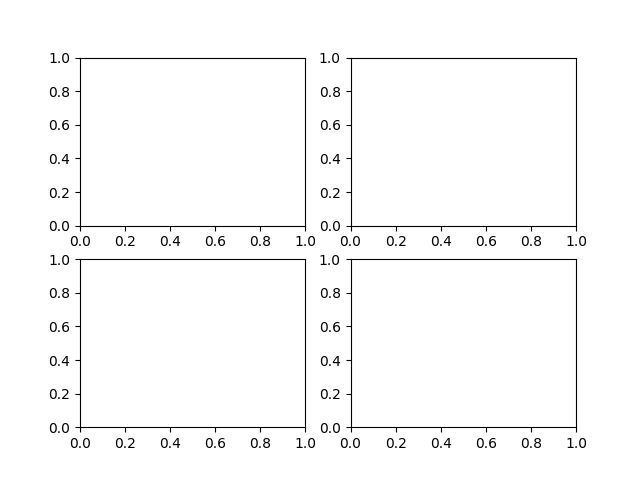

In [4]:
fig_initial_colour, ax_initial_colour = plt.subplot_mosaic([['A','B'],['C','D']])

In [5]:
Merge_Cartesian.plot_fanout_seismic(data_output.Voltage_Interconnect_Inductor,ax_initial_colour['A'],"Inductor Voltage Fanout",True,True)
Merge_Cartesian.plot_fanout_seismic(data_output.Voltage_Interconnect_Capacitor,ax_initial_colour['B'],"Capacitor Voltage Fanout",True)
Merge_Cartesian.plot_fanout_seismic(data_output.Current_Interconnect_Inductor,ax_initial_colour['C'],"Inductor Current Fanout",True)
Merge_Cartesian.plot_fanout_seismic(data_output.Current_Interconnect_Capacitor,ax_initial_colour['D'],"Capacitor Current Fanout",True)

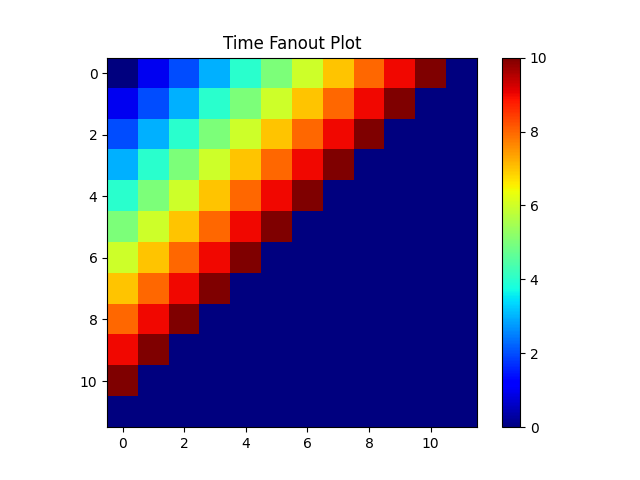

In [6]:
fig_time, ax_time = plt.subplots()

Merge_Cartesian.plot_fanout_colour(data_output.Time,ax_time,"Time Fanout Plot")

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

Nx,Ny = Voltage_Capacitor.shape
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
X, Y = np.meshgrid(x, y)

ax.plot_surface(X,Y,Voltage_Capacitor,cmap=cm.coolwarm)

# Trying to understand Fanout Frequency

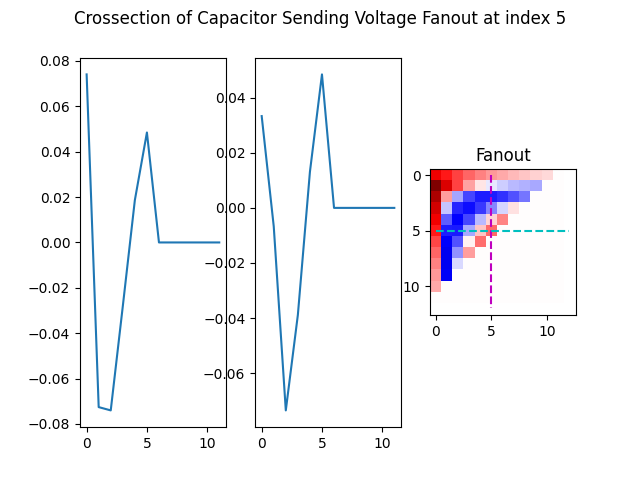

In [7]:
fig_cross, ax_cross = plt.subplots(1,3)
Merge_Cartesian.plot_fanout_crossection(Merge_Cartesian.get_voltage_array (data_output.Wavefronts_Sending_Capacitor),ax_cross,5,"Capacitor Sending Voltage",False)

# Higher Order Merging
-----

## Visualising merigng steps iteritevly

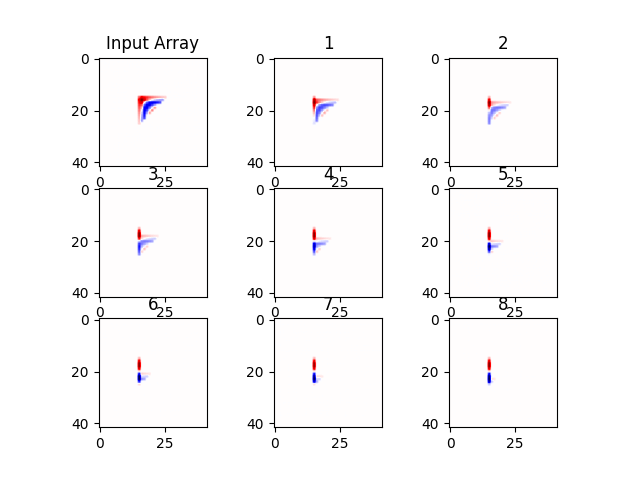

In [8]:
a = data_input.Inductor_LCM_Factor
b = data_input.Capacitor_LCM_Factor

if(data_input.is_Higher_Merging):

    # Frist Row
    fig_merge,ax_merge = plt.subplots(3,3)
    Merge_Cartesian.plot_fanout_seismic(data_output.Voltage_Interconnect_Capacitor, ax_merge[0,0],"Input Array",False)

    voltage_capacitor_merged = Merge_Cartesian.multiplicative_merge_cycle(data_output.Voltage_Interconnect_Capacitor,a,b)
    Merge_Cartesian.plot_fanout_seismic(voltage_capacitor_merged, ax_merge[0,1],"1",False)

    voltage_capacitor_merged = Merge_Cartesian.multiplicative_merge_cycle(voltage_capacitor_merged,a,b)
    Merge_Cartesian.plot_fanout_seismic(voltage_capacitor_merged, ax_merge[0,2],"2",False)


    # Second Row
    voltage_capacitor_merged = Merge_Cartesian.multiplicative_merge_cycle(voltage_capacitor_merged,a,b)
    Merge_Cartesian.plot_fanout_seismic(voltage_capacitor_merged, ax_merge[1,0],"3",False)

    voltage_capacitor_merged = Merge_Cartesian.multiplicative_merge_cycle(voltage_capacitor_merged,a,b)
    Merge_Cartesian.plot_fanout_seismic(voltage_capacitor_merged, ax_merge[1,1],"4",False)

    voltage_capacitor_merged = Merge_Cartesian.multiplicative_merge_cycle(voltage_capacitor_merged,a,b)
    Merge_Cartesian.plot_fanout_seismic(voltage_capacitor_merged, ax_merge[1,2],"5",False)


    # Third Row
    voltage_capacitor_merged = Merge_Cartesian.multiplicative_merge_cycle(voltage_capacitor_merged,a,b)
    Merge_Cartesian.plot_fanout_seismic(voltage_capacitor_merged, ax_merge[2,0],"6",False)

    voltage_capacitor_merged = Merge_Cartesian.multiplicative_merge_cycle(voltage_capacitor_merged,a,b)
    Merge_Cartesian.plot_fanout_seismic(voltage_capacitor_merged, ax_merge[2,1],"7",False)

    voltage_capacitor_merged = Merge_Cartesian.multiplicative_merge_cycle(voltage_capacitor_merged,a,b)
    Merge_Cartesian.plot_fanout_seismic(voltage_capacitor_merged, ax_merge[2,2],"8",False)


## Doing full Merging Cycle

In [9]:
data_output_merged = Merge_Cartesian.Higher_Order_Merging(data_input,data_output)

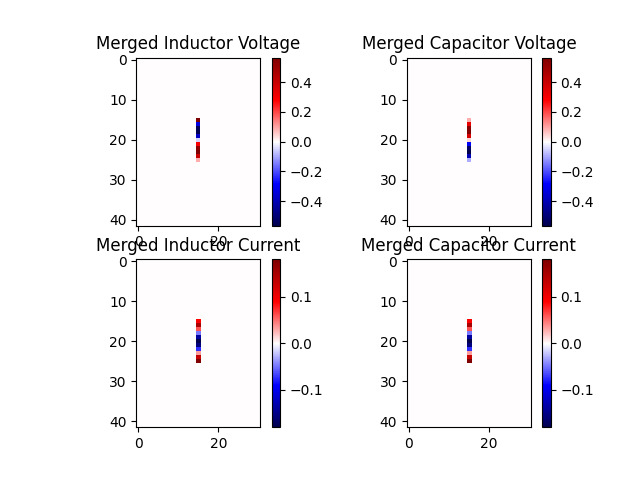

In [10]:
fig_merged, ax_merged = plt.subplot_mosaic([['A','B'],['C','D']])

Merge_Cartesian.plot_fanout_seismic(data_output_merged.Voltage_Interconnect_Inductor,ax_merged['A'],"Merged Inductor Voltage",True,True)
Merge_Cartesian.plot_fanout_seismic(data_output_merged.Current_Interconnect_Inductor,ax_merged['C'],"Merged Inductor Current",True)

Merge_Cartesian.plot_fanout_seismic(data_output_merged.Voltage_Interconnect_Capacitor,ax_merged['B'],"Merged Capacitor Voltage",True)
Merge_Cartesian.plot_fanout_seismic(data_output_merged.Current_Interconnect_Capacitor,ax_merged['D'],"Merged Capacitor Current",True)


## Order merged output

In [11]:
data_output_ordered = Merge_Cartesian.Order_Data_Output_Merged(data_input,data_output_merged)

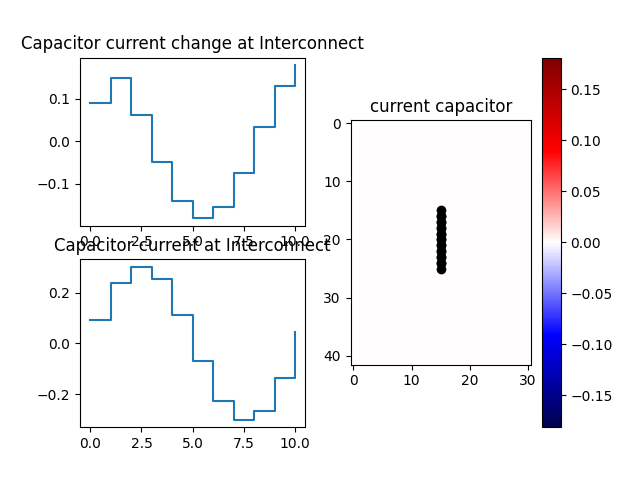

In [12]:
# fig_series_voltage_2,ax_series_voltage_2 =plt.subplot_mosaic([['A','C'],['B','C']])

fig_series_voltage_2,ax_series_voltage_2 = Merge_Cartesian.plot_time_interconnect_3(data_output_merged,data_output_ordered,'current capacitor')

# Wavefront Positions at Time

GridspecLayout(children=(Button(description='step backward', layout=Layout(grid_area='widget001', width='auto'…

FloatSlider(value=0.0, layout=Layout(width='auto'), max=8.934588265796755)

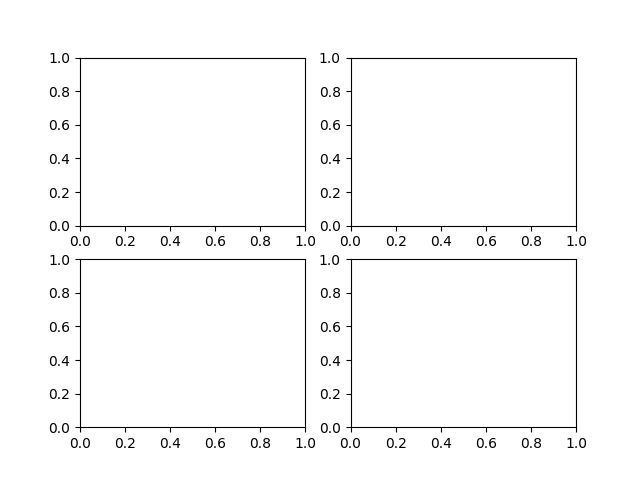

In [13]:
Merge_Cartesian.spatial_investigator_ui(data_input, data_output_merged, data_output_ordered)

Label(value='Video Saving Widget!!')

Label(value='Max Simulation time = 9.93')

ToggleButtons(description='fps:', options=('15', '30', '60'), value='15')

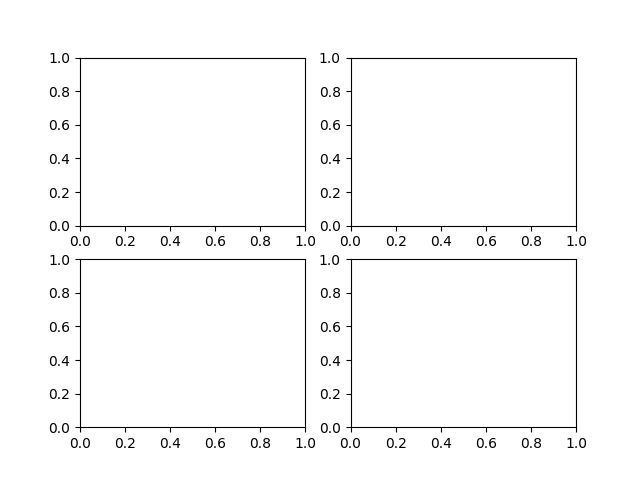

In [14]:
Merge_Cartesian.video_save_ui(data_input, data_output_merged, data_output_ordered)